In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd ./drive/My Drive/Colab Notebooks/fake_real_news 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: './drive/My Drive/Colab Notebooks/fake_real_news'
/content/drive/My Drive/Colab Notebooks/fake_real_news


In [ ]:
true = pd.read_csv('./input/True.csv')
fake = pd.read_csv('./input/Fake.csv')

In [ ]:
true.head(8)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"


In [ ]:
fake.head(8)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"


In [ ]:
# Gán nhãn cho 2 loại tin tức true hoặc fake
true['impression'] = 1
fake['impression'] = 0

In [ ]:
raw_data = pd.concat([true, fake], axis = 0)
raw_data.sample(5)

,title,text,subject,date,impression
5200,White House supports renewal of spy law withou...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"March 1, 2017",1
19786,WOW! HILLARY Took State Department Furniture T...,Most of the documents are testimonies provided...,left-news,"Oct 18, 2016",0
11632,AWESOME RANT By African-American Woman Who’s F...,"You will love, love, love this passionate lady...",politics,"Feb 17, 2017",0
10559,MSNBC HOST Compares Getting Close to Trump to ...,President Trump came out today and said he doe...,politics,"Jun 22, 2017",0
15452,REP LUIS GUTIERREZ (D-NY) CALLS MURDER OF KATE...,Die-hard amnesty for illegal aliens cheerleade...,politics,"Jul 17, 2015",0


In [ ]:
raw_data['fulltext'] = raw_data.title + '' + raw_data.text
raw_data.drop(['title', 'text'], axis = 1, inplace = True)

In [ ]:
dataset = raw_data[['fulltext', 'impression']]
dataset = dataset.reset_index()
dataset.drop(['index'], axis = 1, inplace = True)

In [ ]:
#Kiểm tra xem có dữ liệu bị khuyết giá trị hay không
dataset.isnull().sum()

fulltext      0
impression    0
dtype: int64

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
real_news = dataset[dataset.impression == 1]['fulltext']
fake_news = dataset[dataset.impression == 0]['fulltext']
fake_news = fake_news.reset_index().drop(['index'], axis = 1)

In [ ]:
#Thực thi, triển khai các phương pháp tiền xử lý dữ liệu
def wordcloud(X_datafull):

  def remove_punct(X_data_func):
    string1 = X_data_func.lower()
    translation = dict.fromkeys(map(ord, string.punctuation),' ')
    string2 = string1.translate(translation)
    return string2
  
  X_data_clearpunct = []
  for i in range(len(X_datafull)):
    test_data = remove_punct(X_datafull[i])
    X_data_clearpunct.append(test_data)

  def remove_stopwords(X_data_func):
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    string2 = pattern.sub(' ', X_data_func)
    return string2

  X_data_clearstopwords = []
  for i in range(len(X_datafull)):
    test_data = remove_stopwords(X_datafull[i])
    X_data_clearstopwords.append(test_data)

  def tokenization(X_data_func):
    words = nltk.word_tokenize(X_data_func)
    return words
  
  X_datatokenized = []
  for i in range(len(X_datafull)):
    test_data = tokenization(X_datafull[i])
    X_datatokenized.append(test_data)
  
  lemmatizer = WordNetLemmatizer()
  def lemmatization(X_data_func):
    words = lemmatizer.lemmatize(X_data_func)
    return words

  X_datalemmatized = []
  for i in range(len(X_datafull)):
    test_data = lemmatization(X_datafull[i])
    X_datalemmatized.append(test_data)
  
  return X_datalemmatized

In [ ]:
true_words = wordcloud(real_news)
fake_words = wordcloud(fake_news.fulltext)

In [ ]:
def plot_wordcloud(text):
  wordclouds = WordCloud(background_color = 'black',
                         max_words = 3000,
                         width=1600,
                         height=800).generate(text)
  plt.clf()
  plt.imshow(wordclouds, interpolation='bilinear')
  plt.axis('off')
  plt.show()

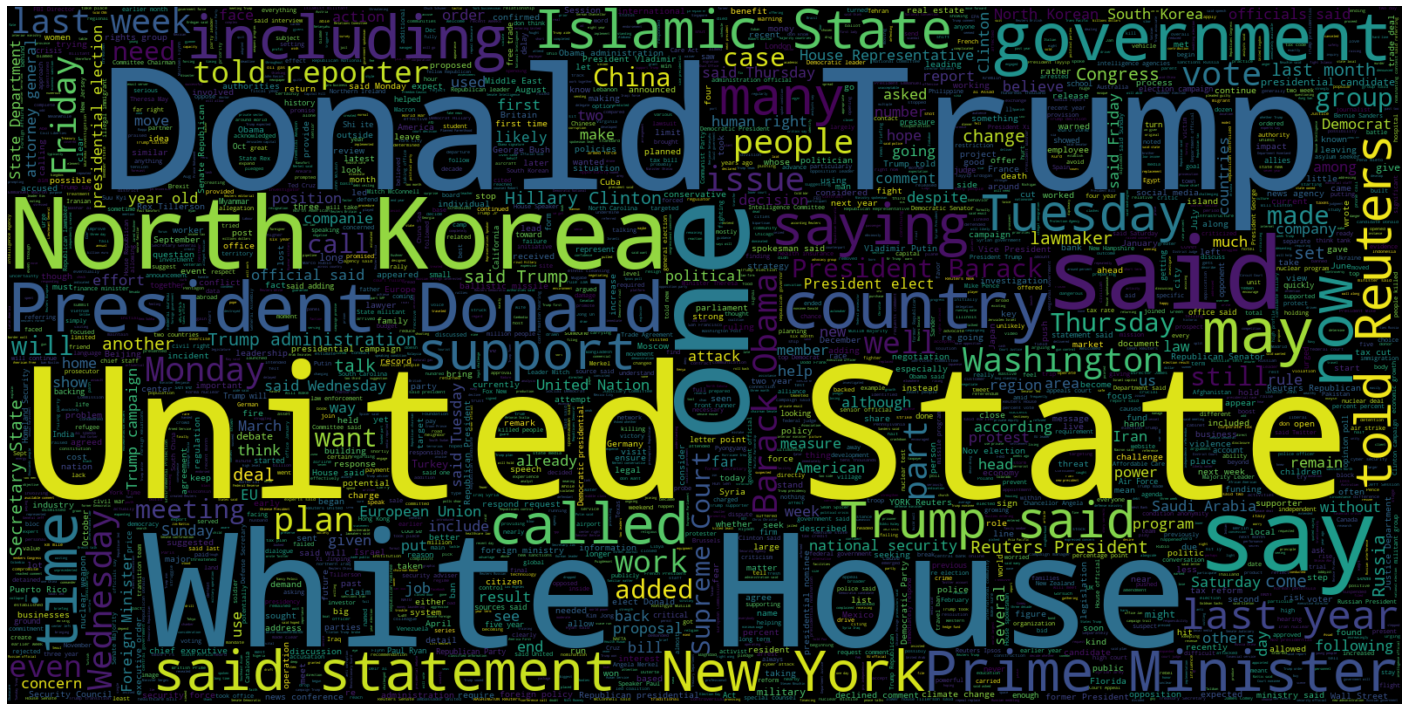

In [ ]:
plt.figure(figsize=(25,20))
plot_wordcloud(' '.join(true_words))

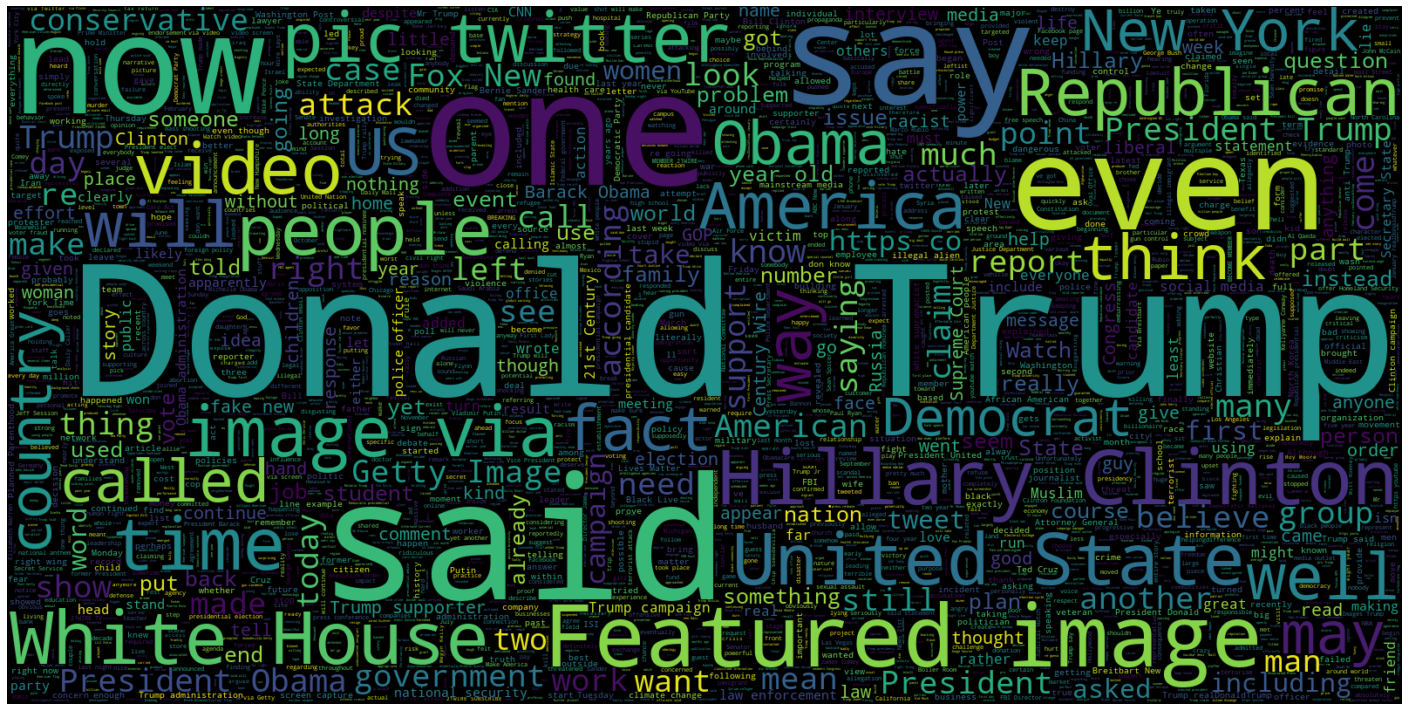

In [ ]:
plt.figure(figsize=(25,20))
plot_wordcloud(' '.join(fake_words))

In [ ]:
X_data = dataset['fulltext']
y_data = dataset.impression
X_data = X_data.astype(str)

In [ ]:
def final(X_datafull):
    
    # function for removing punctuations
    def remove_punct(X_data_func):
        string1 = X_data_func.lower()
        translation = dict.fromkeys(map(ord, string.punctuation),' ')
        string2 = string1.translate(translation)
        return string2
    
    X_data_clearpunct = []
    for i in range(len(X_datafull)):
        test_data = remove_punct(X_datafull[i])
        X_data_clearpunct.append(test_data)
        
    # function to remove stopwords
    def remove_stopwords(X_data_func):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
        string2 = pattern.sub(' ', X_data_func)
        return string2
    def tokenization(X_data_func):
        words = nltk.word_tokenize(X_data_func)
        return words
    
    X_datatokenized = []
    for i in range(len(X_datafull)):
        test_data = tokenization(X_datafull[i])
        X_datatokenized.append(test_data)

    lemmatizer = WordNetLemmatizer()
    def lemmatization(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words

    X_datalemmatized = []
    for i in range(len(X_datafull)):
      test_data = lemmatization(X_datafull[i])
      X_datalemmatized.append(test_data)

    cv = CountVectorizer(max_features=1000)
    X_datavector = cv.fit_transform(X_datalemmatized).toarray()
    
    tfidf = TfidfTransformer()
    X_datatfidf = tfidf.fit_transform(X_datavector).toarray()
    return X_datatfidf
        

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import load_model

seed = 4353

Using TensorFlow backend.


In [ ]:
dataX = final(X_data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataX, y_data, test_size = 0.2, random_state = 42)

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
prediction = MNB.predict(X_test)

In [ ]:
#Đánh giá Model

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

MNB_f1 = round(f1_score(y_test, prediction, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, prediction)*100),3)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4650
           1       0.93      0.93      0.93      4330

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

[[4339  311]
 [ 312 4018]]
Accuracy :  93.062  %
f1_score :  0.931


**Thuật toán Random Forest**

In [ ]:
RF = RandomForestClassifier(n_estimators=10, random_state=42)
RF.fit(X_train, y_train)
prediction_2 = RF.predict(X_test)

In [ ]:
#Đánh giá Model
print(classification_report(y_test, prediction_2))
print(confusion_matrix(y_test, prediction_2))

rfc_f1 = round(f1_score(y_test, prediction_2, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, prediction_2) * 100), 3)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4650
           1       1.00      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

[[4635   15]
 [  33 4297]]
Accuracy :  99.465  %
f1_score :  0.995


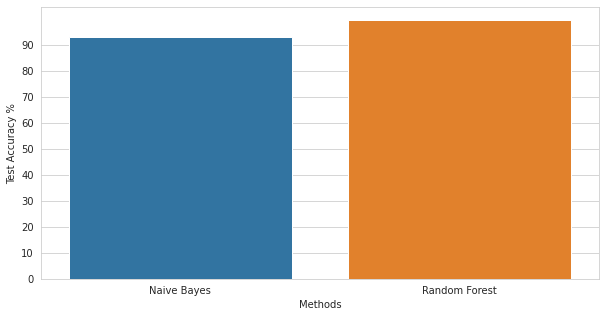

In [ ]:
model = ['Naive Bayes', 'Random Forest']
acc = [MNB_accuracy, rfc_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Methods")
sns.barplot(x= model, y= acc)
plt.show()

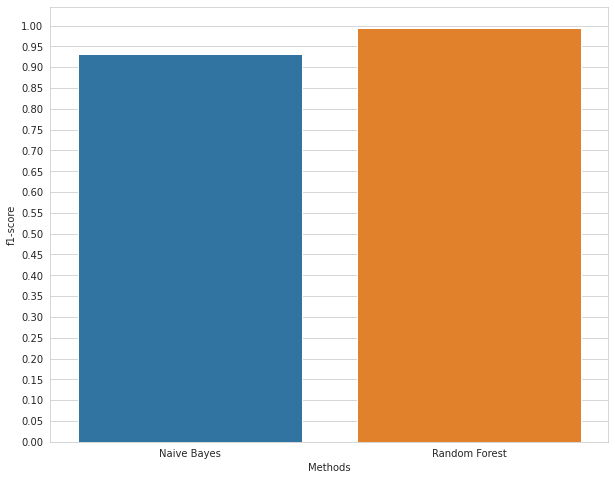

In [ ]:
model = ['Naive Bayes', 'Random Forest']
f1_score = [MNB_f1, rfc_f1]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.yticks(np.linspace(0,1,21))
plt.ylabel("f1-score")
plt.xlabel("Methods")
sns.barplot(x= model,  y= f1_score)
plt.show()